# Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from Bio import SeqIO
tf.get_logger().setLevel('WARNING')

# Carregando os dados

In [2]:
Train_Data = pd.read_csv("Dados/heart.csv")
Train_Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Descrição das colunas

1. __Age__ is the age of candidate.
2. __Sex__ has numeric values. 1 denotes male and 0 denotes female.
3. __Chest Pain__ pain has values between 0-3. The types of angina that are described in the research paper. The higher the number, the lesser are the odds of heart attack.
4. __Resting blood pressure__ is normal pressure with no exercise.
5. __Cholesterol__ means the blockage for blood supply in the blood vessels.
6. __Fasting Blood Pressure__ is blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning. 1 denotes > 120 mg/dl 
7. __Rest ECG (electrocardiographic) results__ means ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening. Values 0,1,2.
8. __The Maximum Heart Rate achieved__.
9. __Exercise induced angina__ is chest pain while exercising or doing any physical activity. 1 denotes presence and 0 denotes absence.
10. __Oldpeak__ = ST Depression induced by exercise relative to rest. ST Depression is the difference between value of ECG at rest and after exercise.
11. __ST Slope__ is the tangent to the depression value.
12. __The number of major blood vessels (0-3) supplying blood to heart blocked__.
13. __The Types of thalassemia__.
14. __Heart attack prediction__ where 1 denotes Heart attack occured and 0 where it din't take occur.

In [3]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Checar se as classes estão balanceadas

In [4]:
Train_Data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Checar se existem dados duplicados

In [5]:
print("Duplicated values: ", Train_Data.duplicated().sum())
duplicate = Train_Data[Train_Data.duplicated()]
duplicate

Duplicated values:  1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### Remover dados duplicados, deixando apenas a primeira ocorrência

In [6]:
Train_Data.drop_duplicates(keep='first',inplace=True) 
Train_Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Checar se existem dados faltantes

In [7]:
print("Missing values: ", Train_Data.isnull().sum().sum())

Missing values:  0


# Checar se existem correlações entre os atributos e a saída

In [8]:
corr = Train_Data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


# Rede neural

In [9]:
from sklearn.neural_network import MLPClassifier

## Dividir atributos e saída

In [10]:
X=Train_Data[Train_Data.columns[Train_Data.columns!='target']]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [11]:
Y=Train_Data['target']

## Dividir treinamento e teste

In [12]:
train_x, test_x, train_y,test_y=train_test_split(X,Y,random_state=0,test_size=0.2)
print(train_y.shape, test_y.shape)

(241,) (61,)


## Rede neural multicamadas sklearn

In [13]:
def MLP(train_x, train_y, test_x, test_y, n_neurons):
    reg = MLPClassifier(hidden_layer_sizes=(n_neurons,n_neurons,n_neurons), activation="relu" ,random_state=1, max_iter=200).fit(train_x, train_y)
    y_pred=reg.predict(test_x)

    model_accuracy = round(accuracy_score(test_y, y_pred),2)
    #confusion matrix
    cm = confusion_matrix(test_y, y_pred)
    return model_accuracy,cm, y_pred

In [18]:
accuracy,conf_marix,y_pred = MLP(train_x, train_y, test_x, test_y, 512)
print("Model Accuracy:" + str(accuracy) + "\n" + "Confusion Matrix:\n" + str(conf_marix))

Model Accuracy:0.8
Confusion Matrix:
[[21  6]
 [ 6 28]]


In [15]:
def error_plot(train_x, train_y, test_x, test_y):

    error = []

    # Calculando o erro variando o número de neurônios, incrementando em base 2 (16,32,64,128,256 e 512)
    n_neurons = 16
    while n_neurons <=512:
        accuracy,conf_marix,y_pred = MLP(train_x, train_y, test_x ,test_y, n_neurons)
        error.append(np.mean(y_pred != test_y))
        n_neurons *= 2
        
    plt.figure(figsize=(12, 6))
    plt.plot(error, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate Neurons Quantity')
    plt.xlabel('Neurons Quantity')
    plt.ylabel('Mean Error')

/home/thais/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


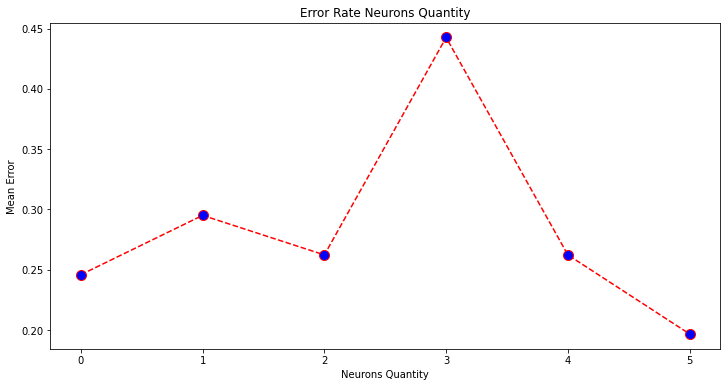

In [16]:
error_plot(train_x, train_y, test_x, test_y)

## Rede neural multicamadas keras

In [19]:
def NN(train_x, train_y, test_x, test_y, n_neurons):
    
    tf.random.set_seed(2)
    
    NN_model = keras.Sequential([
    keras.layers.Dense(n_neurons, activation='relu', input_shape=train_x.shape),
    keras.layers.Dense(n_neurons, activation='relu'),
    keras.layers.Dense(n_neurons, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])
    
    NN_model.compile(
    loss='binary_crossentropy',
    optimizer='adamax',
    metrics=['accuracy']
    )
    
    
    train_history = NN_model.fit(
    train_x, train_y,
    validation_data=(test_x, test_y),
    batch_size = 8,
    shuffle=True,
    epochs = 30,
    verbose = 0
    )
    
    
    results = NN_model.evaluate(test_x, test_y)

    return results

In [20]:
accuracy = NN(train_x, train_y, test_x, test_y, 64)
print("\n\nModel Accuracy:" + str(accuracy[1]))

2/2 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7541


Model Accuracy:0.7540983557701111


In [21]:
def accuracy_plot(train_x, train_y, test_x, test_y):

    accuracy = []

    # Calculando o erro variando o número de neurônios, incrementando em base 2 (16,32,64,128,256 e 512)
    n_neurons = 16
    while n_neurons <=512:
    
        results = NN(train_x, train_y, test_x, test_y, n_neurons)
        accuracy.append(np.mean(results[1]))
        n_neurons *= 2
        
        
    plt.figure(figsize=(12, 6))
    plt.plot(accuracy, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Accuracy Rate Neurons Quantity')
    plt.xlabel('Neurons Quantity')
    plt.ylabel('Mean Accuracy')

2/2 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7705


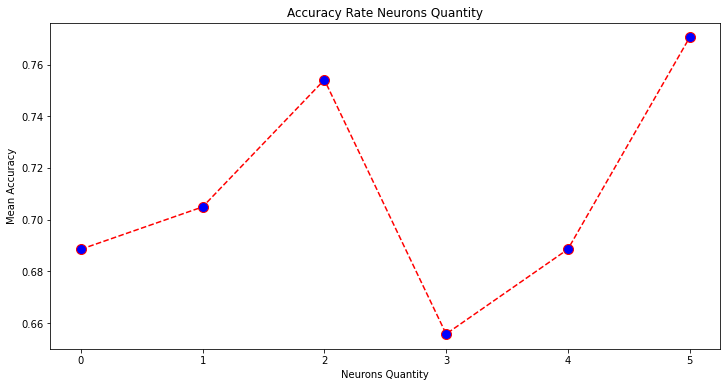

In [22]:
accuracy_plot(train_x, train_y, test_x, test_y)

# Normalizando os dados

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.fit_transform(test_x)

# Visualizando normalização

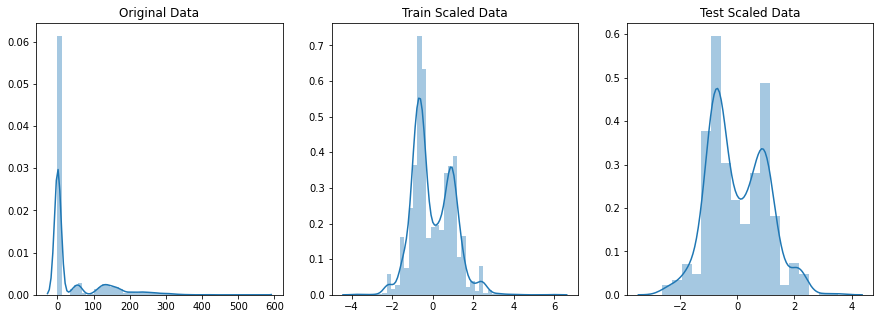

In [24]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
sns.distplot(np.concatenate(X.values), ax=ax[0]).set_title('Original Data')
sns.distplot(np.concatenate(X_train_scaled), ax=ax[1]).set_title('Train Scaled Data')
sns.distplot(np.concatenate(X_test_scaled), ax=ax[2]).set_title('Test Scaled Data')
plt.tight_layout
plt.show()

# Redes neurais

In [25]:
accuracy,conf_marix,y_pred = MLP(X_train_scaled, train_y, X_test_scaled ,test_y,64)
print("Model Accuracy:" + str(accuracy) + "\n" + "Confusion Matrix:\n" + str(conf_marix))

Model Accuracy:0.84
Confusion Matrix:
[[22  5]
 [ 5 29]]


In [26]:
accuracy = NN(X_train_scaled, train_y, X_test_scaled ,test_y,64)
print("\n\nModel Accuracy:" + str(accuracy[1]))

2/2 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8852


Model Accuracy:0.8852459192276001


# Usando arquivo Multi-Fasta

![Random Unsplash Image](https://www.researchgate.net/profile/Morteza-Hosseini-6/publication/309134977/figure/fig1/AS:417452136648705@1476539753111/A-sample-of-the-Multi-FASTA-file.png)

In [27]:
with open('Dados/Crocodylus_porosus_train.fa') as fasta_file:
    identifiers = []
    sequences = []
    description = []
    for seq_record in SeqIO.parse(fasta_file, 'fasta'):
        identifiers.append(seq_record.id)
        sequences.append(seq_record.seq)
        description.append(seq_record.description)


## Usando contagem de tri-nucleotídeos

In [28]:
def trinucleotides_counts(identifiers, sequences, description, out_file):
    
    output_file = open(out_file, 'w')
    mapa = {"A" : 0,"C" : 1,"T" : 2,"G" : 3}
    tri_nucleotides_counts =[[[0 for col in range(4)]for row in range(4)] for x in range(4)]
    toCompare = ["A","C","T","G"]
    
    for seq,ident,desc in zip(sequences,identifiers,description):
        for x in range(0,len(seq)-2,3):
            if(seq[x] in toCompare):
                first = mapa[seq[x]]
            if(seq[x+1] in toCompare):
                seccond = mapa[seq[x + 1]]
            if(seq[x+2] in toCompare):
                third = mapa[seq[x + 2]]
                tri_nucleotides_counts[first][seccond][third] += 1
                

        for i in range(0, 4):
            for j in range(0, 4):
                for l in range(0, 4):
                    if(i ==3 & j==3 & l==3):
                        if('ncrna' in desc):
                            output_file.writelines(str(tri_nucleotides_counts[i][j][l]) + ',' + "ncrna\n")
                        else:
                            output_file.writelines(str(tri_nucleotides_counts[i][j][l]) + ',' + "coding\n")
                    else:
                        output_file.writelines(str(tri_nucleotides_counts[i][j][l]) + ", ")
                        
        tri_nucleotides_counts =[[[0 for col in range(4)]for row in range(4)] for x in range(4)]


In [30]:
output_file = 'file_test.csv'
trinucleotides_counts(identifiers, sequences, description, output_file)

In [31]:
data = pd.read_csv('file_test.csv', header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,2,6,5,3,12,9,3,2,6,12,...,1,6,1,0,1,3,3,0,1,coding
1,1,1,1,1,4,3,1,0,6,6,...,1,2,1,0,0,2,2,0,1,coding
2,1,5,1,0,5,4,2,0,2,5,...,0,0,0,1,1,1,2,1,0,coding
3,3,19,7,26,9,19,2,9,0,21,...,11,1,15,4,35,2,30,3,12,coding
4,1,8,4,13,5,5,2,2,2,9,...,1,0,14,2,10,4,13,0,5,coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7383,1,2,0,0,1,0,0,0,0,2,...,0,2,0,0,1,1,0,0,0,ncrna
7384,1,1,0,1,1,0,1,0,1,2,...,0,2,0,0,1,1,0,0,0,ncrna
7385,4,1,8,1,1,0,0,0,0,0,...,1,1,1,1,2,2,0,2,0,ncrna
7386,2,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,4,2,2,0,ncrna


## Separando alvo (classe a ser predita) dos atributos

In [32]:
Y=data[64]
Y

0       coding
1       coding
2       coding
3       coding
4       coding
         ...  
7383     ncrna
7384     ncrna
7385     ncrna
7386     ncrna
7387     ncrna
Name: 64, Length: 7388, dtype: object

In [33]:
X = data[data.columns[data.columns!=64]].astype(float)
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,2.0,6.0,5.0,3.0,12.0,9.0,3.0,2.0,6.0,12.0,...,0.0,1.0,6.0,1.0,0.0,1.0,3.0,3.0,0.0,1.0
1,1.0,1.0,1.0,1.0,4.0,3.0,1.0,0.0,6.0,6.0,...,2.0,1.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,1.0
2,1.0,5.0,1.0,0.0,5.0,4.0,2.0,0.0,2.0,5.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0
3,3.0,19.0,7.0,26.0,9.0,19.0,2.0,9.0,0.0,21.0,...,11.0,11.0,1.0,15.0,4.0,35.0,2.0,30.0,3.0,12.0
4,1.0,8.0,4.0,13.0,5.0,5.0,2.0,2.0,2.0,9.0,...,4.0,1.0,0.0,14.0,2.0,10.0,4.0,13.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7383,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7384,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7385,4.0,1.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0
7386,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,2.0,0.0


In [34]:
X["sum"] = X.sum(axis=1)
X["sum"] =  X["sum"] * 3
X

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,sum
0,2.0,6.0,5.0,3.0,12.0,9.0,3.0,2.0,6.0,12.0,...,1.0,6.0,1.0,0.0,1.0,3.0,3.0,0.0,1.0,684.0
1,1.0,1.0,1.0,1.0,4.0,3.0,1.0,0.0,6.0,6.0,...,1.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,1.0,348.0
2,1.0,5.0,1.0,0.0,5.0,4.0,2.0,0.0,2.0,5.0,...,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,294.0
3,3.0,19.0,7.0,26.0,9.0,19.0,2.0,9.0,0.0,21.0,...,11.0,1.0,15.0,4.0,35.0,2.0,30.0,3.0,12.0,2133.0
4,1.0,8.0,4.0,13.0,5.0,5.0,2.0,2.0,2.0,9.0,...,1.0,0.0,14.0,2.0,10.0,4.0,13.0,0.0,5.0,846.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7383,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,126.0
7384,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,...,0.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,201.0
7385,4.0,1.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,264.0
7386,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,4.0,2.0,2.0,0.0,162.0


## Normalização pelo tamanho da sequência

In [35]:
X = X.iloc[:,0:-1].div(X['sum'], axis=0)
X

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.002924,0.008772,0.007310,0.004386,0.017544,0.013158,0.004386,0.002924,0.008772,0.017544,...,0.000000,0.001462,0.008772,0.001462,0.000000,0.001462,0.004386,0.004386,0.000000,0.001462
1,0.002874,0.002874,0.002874,0.002874,0.011494,0.008621,0.002874,0.000000,0.017241,0.017241,...,0.005747,0.002874,0.005747,0.002874,0.000000,0.000000,0.005747,0.005747,0.000000,0.002874
2,0.003401,0.017007,0.003401,0.000000,0.017007,0.013605,0.006803,0.000000,0.006803,0.017007,...,0.003401,0.000000,0.000000,0.000000,0.003401,0.003401,0.003401,0.006803,0.003401,0.000000
3,0.001406,0.008908,0.003282,0.012189,0.004219,0.008908,0.000938,0.004219,0.000000,0.009845,...,0.005157,0.005157,0.000469,0.007032,0.001875,0.016409,0.000938,0.014065,0.001406,0.005626
4,0.001182,0.009456,0.004728,0.015366,0.005910,0.005910,0.002364,0.002364,0.002364,0.010638,...,0.004728,0.001182,0.000000,0.016548,0.002364,0.011820,0.004728,0.015366,0.000000,0.005910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7383,0.007937,0.015873,0.000000,0.000000,0.007937,0.000000,0.000000,0.000000,0.000000,0.015873,...,0.000000,0.000000,0.015873,0.000000,0.000000,0.007937,0.007937,0.000000,0.000000,0.000000
7384,0.004975,0.004975,0.000000,0.004975,0.004975,0.000000,0.004975,0.000000,0.004975,0.009950,...,0.000000,0.000000,0.009950,0.000000,0.000000,0.004975,0.004975,0.000000,0.000000,0.000000
7385,0.015152,0.003788,0.030303,0.003788,0.003788,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.003788,0.003788,0.003788,0.003788,0.007576,0.007576,0.000000,0.007576,0.000000
7386,0.012346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012346,0.000000,0.000000,0.006173,0.006173,0.000000,0.024691,0.012346,0.012346,0.000000


## Dividindo entre treinamento e teste

In [36]:
train_x, test_x, train_y,test_y=train_test_split(X,Y,random_state=0,test_size=0.2)
print(train_y.shape, test_y.shape)

(5910,) (1478,)


## Redes neurais

In [39]:
accuracy,conf_marix,y_pred = MLP(train_x, train_y, test_x, test_y, 64)
print("Model Accuracy:" + str(accuracy) + "\n" + "Confusion Matrix:\n" + str(conf_marix))

Model Accuracy:0.96
Confusion Matrix:
[[710  28]
 [ 35 705]]


In [40]:
accuracy = NN(train_x, train_y.map({'coding': 1, 'ncrna': 0}), test_x ,test_y.map({'coding': 1, 'ncrna': 0}), 64)
print("Model Accuracy:" + str(accuracy[1]))

47/47 [==============================] - 0s 504us/step - loss: 0.1159 - accuracy: 0.9581
Model Accuracy:0.9580514430999756
